In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import boxplot


In [118]:
# Windows용 한글 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 정상 표시 (음수 깨짐 방지)

plt.rcParams['axes.unicode_minus'] = False


In [119]:
customers_df = pd.read_csv('data/olist_customers_dataset.csv')
sellers_df = pd.read_csv('data/olist_sellers_dataset.csv')
orders_df = pd.read_csv('data/olist_orders_dataset.csv')
products_df = pd.read_csv('data/olist_products_dataset.csv')
geolocation_df = pd.read_csv('data/olist_geolocation_dataset.csv')
order_items_df = pd.read_csv('data/olist_order_items_dataset.csv')
order_reviews_df = pd.read_csv('data/olist_order_reviews_dataset.csv')
categories_df = pd.read_csv('data/product_category_name_translation.csv')

In [120]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [121]:
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [122]:
categories_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [123]:
# 가격 정보가 포함된 order_items_df + products_df + categories_df 결합
price_df = (
    order_items_df
    .merge(products_df, on='product_id', how='left')
    .merge(categories_df, on='product_category_name', how='left')
)
price_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


# 이상치 탐지

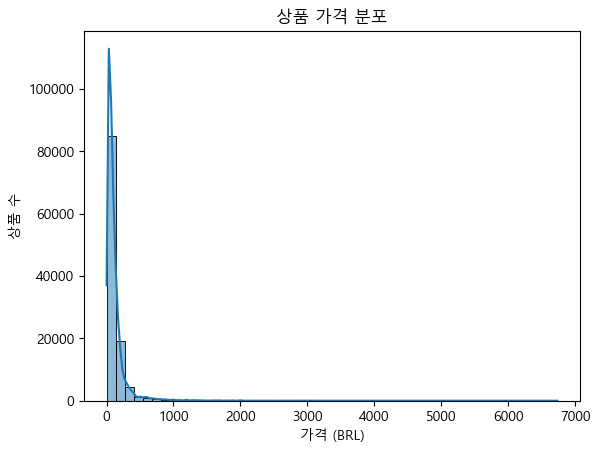

In [124]:
sns.histplot(price_df['price'], bins=50, kde=True)
plt.title('상품 가격 분포')
plt.xlabel('가격 (BRL)')
plt.ylabel('상품 수')
plt.show()
# 대부분의 상품이 1000BRL 안팎인걸 확인
# 한화 기준 30만원 안쪽상품이 가장 많음

# 카테고리별 평균 가격 TOP 10

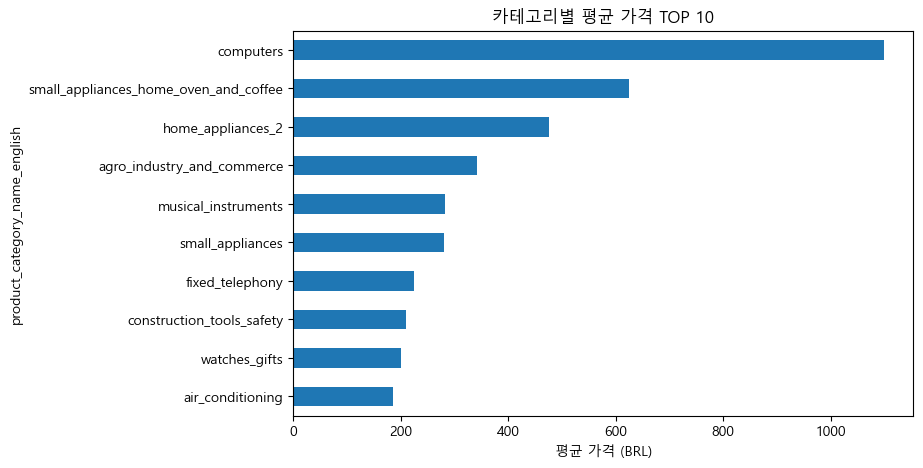

In [125]:
category_price = (
    price_df.groupby('product_category_name_english')['price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

category_price.plot(kind='barh', title='카테고리별 평균 가격 TOP 10', figsize=(8,5))
plt.xlabel('평균 가격 (BRL)')
plt.gca().invert_yaxis()
plt.show()
# 컴퓨터를 많이 구매함

 # 가격에 따른 배송비 관계가 있을까?

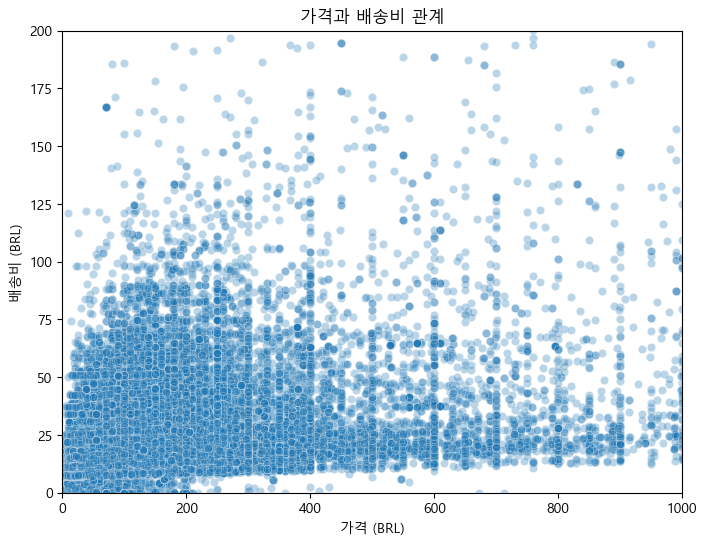

In [126]:

# 해본 시도들 스케터플롯 -> 데이터많아서 상관관계찾기힘듦
# 히트맵 - > 이상치 제거가 필요함
plt.figure(figsize=(8,6))
sns.scatterplot(data=price_df, x='price', y='freight_value', alpha=0.3)
plt.xlim(0, 1000)  # X축 범위 0~1000
plt.ylim(0, 200)   # Y축 범위 0~200 (필요하면)
plt.title('가격과 배송비 관계')
plt.xlabel('가격 (BRL)')
plt.ylabel('배송비 (BRL)')
plt.show()
# 분포가 몰려있네?
# 바로 히트맵작성하러


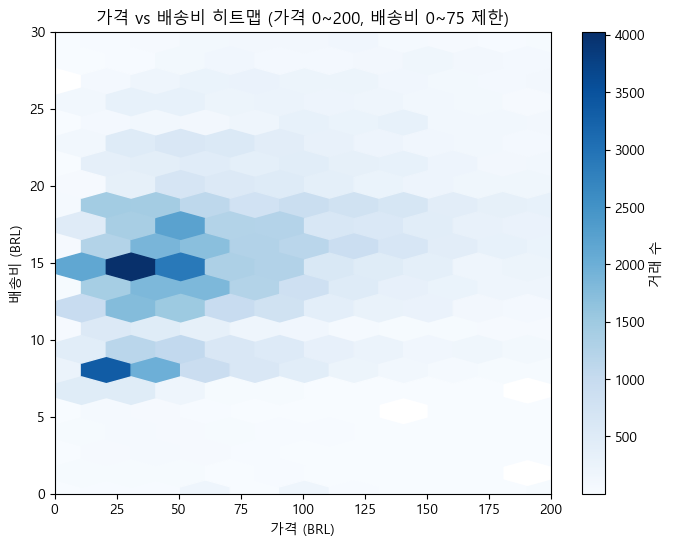

In [127]:
# 가격과 배송비 범위 제한
filtered = price_df[(price_df['price'] <= 1000) & (price_df['freight_value'] <= 75)]

plt.figure(figsize=(8,6))
hb = plt.hexbin(filtered['price'], filtered['freight_value'], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(hb, label='거래 수')
plt.xlabel('가격 (BRL)')
plt.ylabel('배송비 (BRL)')
plt.title('가격 vs 배송비 히트맵 (가격 0~200, 배송비 0~75 제한)')
plt.ylim(0, 30)
plt.xlim(0, 200)
plt.show()

# 데이터가 좀 편향이있어서 대부분의 거래가 25(BRL)에 머물러있기때문에
# 가격과의 상관관계는 거의 없는것으로 추정됨
# 대신 평균 배송비가 15 BRL 언저리에 머물러있는것을 알수있었음

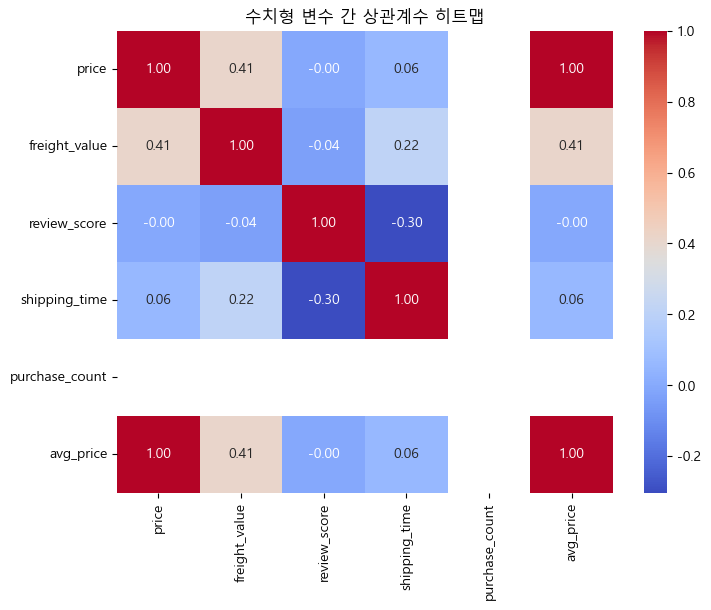

In [128]:
# 2. 날짜 컬럼 datetime 변환 및 shipping_time 계산
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['shipping_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

# 3. 주문 아이템과 리뷰 합치기
merged = pd.merge(order_items_df, order_reviews_df, on='order_id')

# 4. 배송 시간과 customer_id 추가 병합
merged = pd.merge(merged, orders_df[['order_id', 'shipping_time', 'customer_id']], on='order_id', how='left')

# 5. 고객별 재구매 횟수와 평균 구매 가격 계산
cust_summary = merged.groupby('customer_id').agg(
    purchase_count=('order_id', 'nunique'),
    avg_price=('price', 'mean')
).reset_index()

# 6. 고객별 요약정보를 merged에 다시 합치기
final_df = pd.merge(merged, cust_summary, on='customer_id', how='left')

# 7. 상관계수 분석할 컬럼 리스트 지정
num_cols = ['price', 'freight_value', 'review_score', 'shipping_time', 'purchase_count', 'avg_price']

# 8. 상관계수 계산 및 히트맵 시각화
corr = final_df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('수치형 변수 간 상관계수 히트맵')
plt.show()

## 그래도 중간정도의 상관관계가 있긴했음


# 리뷰 평점과 가격 사이의 관계 보기 - 가격이 높을수록 평점은?

# 가격대별 평균 리뷰 점수 확인

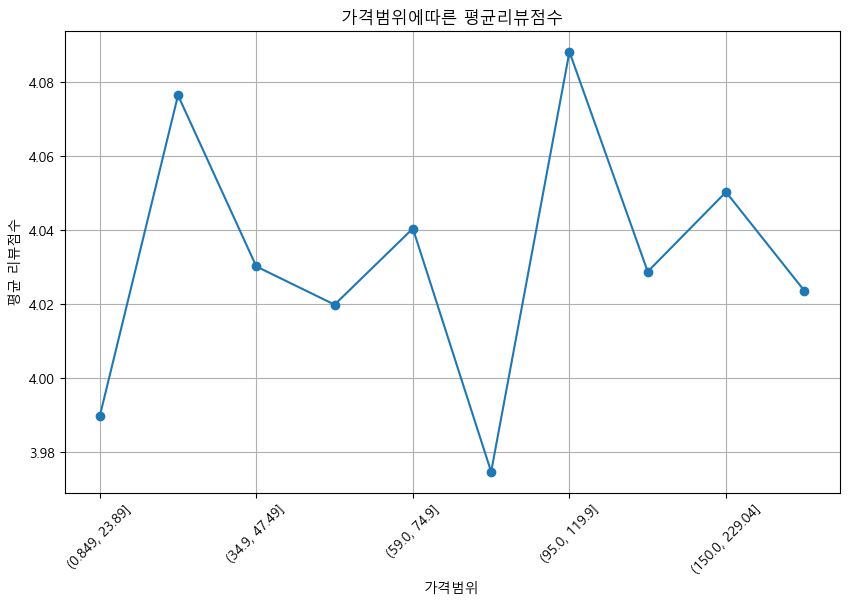

In [129]:
df = pd.merge(order_reviews_df, order_items_df[['order_id', 'price']], on='order_id', how='inner')

# 가격을 10개 구간으로 나누기
df['price_bin'] = pd.qcut(df['price'], 10)

# 가격 구간별 리뷰 평점 평균 계산
avg_score_by_price = df.groupby('price_bin')['review_score'].mean()

# 시각화
plt.figure(figsize=(10,6))
avg_score_by_price.plot(marker='o')
plt.xticks(rotation=45)
plt.xlabel('가격범위')
plt.ylabel('평균 리뷰점수')
plt.title('가격범위에따른 평균리뷰점수')
plt.grid(True)
plt.show()

# 결론 상관없음

# 가격 vs 배송 소요 시간

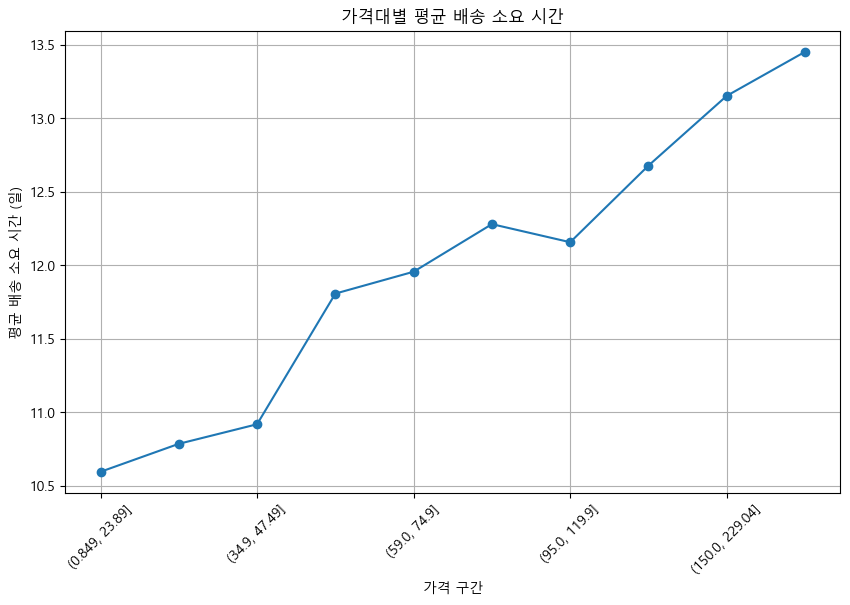

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# 가격 구간 10개로 나누기
merged['price_bin'] = pd.qcut(merged['price'], 10)

# 가격 구간별 배송시간 평균 계산
avg_shipping_by_price = merged.groupby('price_bin')['shipping_time'].mean()

# 시각화
plt.figure(figsize=(10,6))
avg_shipping_by_price.plot(marker='o')
plt.title('가격대별 평균 배송 소요 시간')
plt.xlabel('가격 구간')
plt.ylabel('평균 배송 소요 시간 (일)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#가격이 비쌀수록 배송 소요 시간이 더걸렸음

# 지역별로 더 많은 금액을 사용했을까?

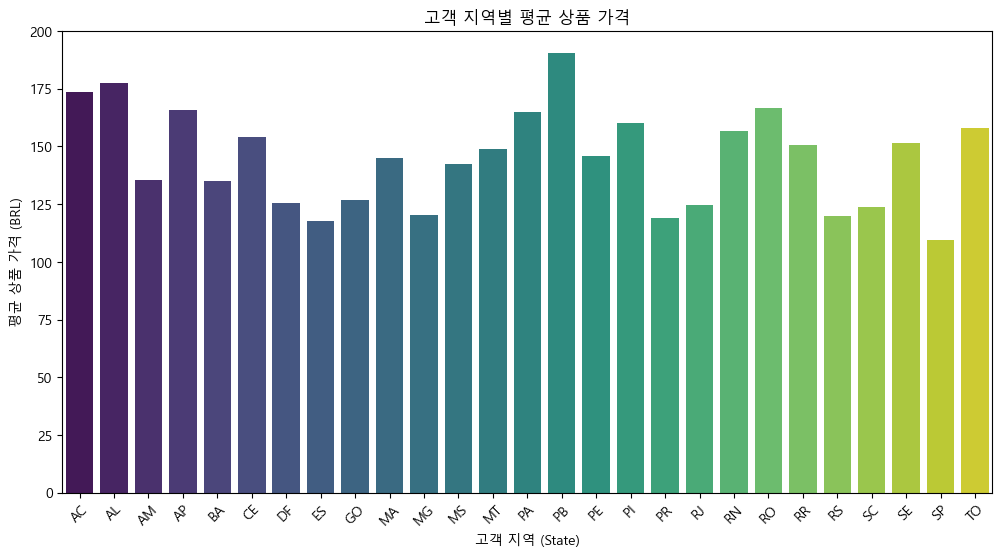

In [131]:
merged = pd.merge(order_items_df, order_reviews_df, on='order_id')
merged = pd.merge(merged, orders_df[['order_id', 'customer_id']], on='order_id', how='left')

# 2. merged에 customers_df에서 customer_state 추가
merged = pd.merge(merged, customers_df[['customer_id', 'customer_state']], on='customer_id', how='left')

# 3. 고객 지역별 평균 가격 계산
cust_price = merged.groupby('customer_state')['price'].mean().reset_index()

# 4. 시각화
plt.figure(figsize=(12,6))
sns.barplot(x='customer_state', y='price', data=cust_price, palette='viridis')
plt.title('고객 지역별 평균 상품 가격')
plt.xlabel('고객 지역 (State)')
plt.ylabel('평균 상품 가격 (BRL)')
plt.xticks(rotation=45)
plt.show()

# PE가 높긴하네

# 재구매를 한사람들중에 어떤가격대가 제일 재구매가 높았을까?

Series([], Name: purchase_count, dtype: float64)


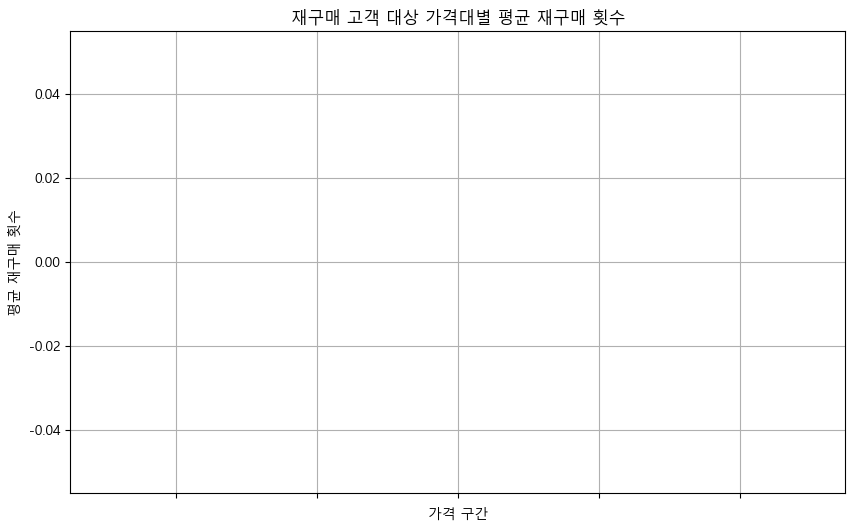

In [135]:
## pass 여기 수정 필요

# 시기별 가격 변화

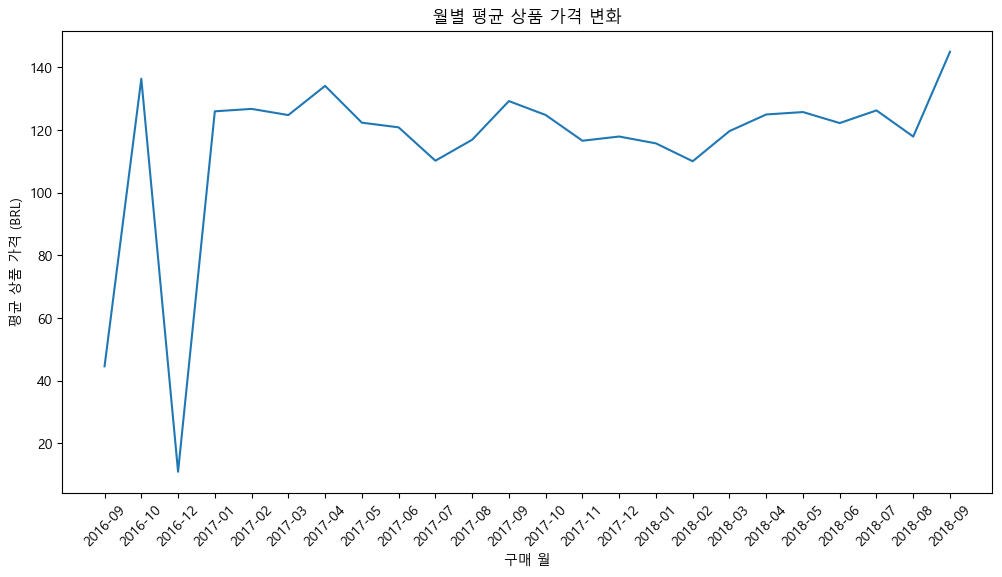

In [133]:
# 1. order_month 컬럼 생성
orders_df['order_month'] = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.to_period('M')

# 2. merged에 orders_df에서 order_month 추가 (반드시 결과를 변수에 저장)
merged_with_month = merged.merge(orders_df[['order_id', 'order_month']], on='order_id', how='left')

# 3. 월별 평균 가격 계산
month_avg_price = merged_with_month.groupby('order_month')['price'].mean().reset_index()

# 4. 시각화를 위해 order_month를 문자열로 변환 (Period -> str)
month_avg_price['order_month'] = month_avg_price['order_month'].astype(str)

# 5. 시각화
plt.figure(figsize=(12,6))
sns.lineplot(data=month_avg_price, x='order_month', y='price')
plt.title('월별 평균 상품 가격 변화')
plt.xlabel('구매 월')
plt.ylabel('평균 상품 가격 (BRL)')
plt.xticks(rotation=45)
plt.show()


In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

merged = pd.merge(order_items_df, order_reviews_df, on='order_id', how='inner')
merged = pd.merge(merged, orders_df[['order_id', 'customer_id', 'order_purchase_timestamp', 'order_delivered_customer_date']], on='order_id', how='left')

# 3. 배송시간 계산 (order_delivered_customer_date - order_purchase_timestamp, 단위: 일)
merged['order_purchase_timestamp'] = pd.to_datetime(merged['order_purchase_timestamp'])
merged['order_delivered_customer_date'] = pd.to_datetime(merged['order_delivered_customer_date'])
merged['shipping_time'] = (merged['order_delivered_customer_date'] - merged['order_purchase_timestamp']).dt.days

# 4. 필요한 컬럼 선택 및 결측치 제거 (shipping_time이 없는 데이터는 제거)
data = merged[['price', 'freight_value', 'shipping_time']].dropna()

# 5. 학습/테스트 데이터 분리
X = data[['price', 'freight_value']]
y = data['shipping_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. 랜덤포레스트 회귀 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. 예측 및 평가
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'평균 절대 오차 (MAE): {mae:.2f} 일')


KeyboardInterrupt: 